In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_raw: pd.DataFrame = pd.read_excel("ev-range.xlsx")
df_raw.head()

,Speed [mph],Range [mi]
0,2,154.4
1,4,248.6
2,6,309.3
3,8,349.7
4,10,376.4


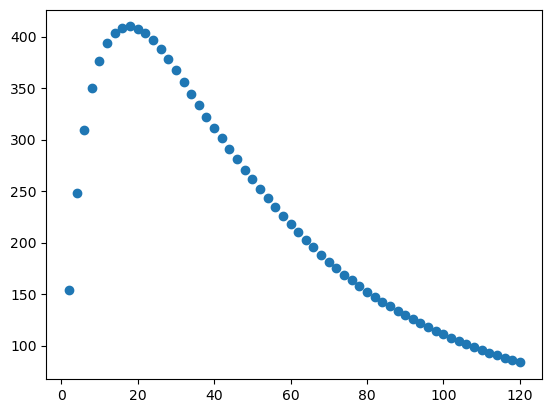

In [7]:
x = df_raw["Speed [mph]"]
y = df_raw["Range [mi]"]

plt.scatter(x, y)

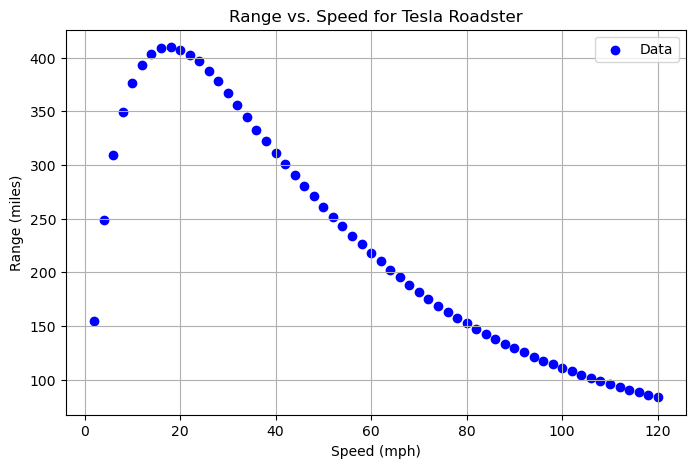

In [10]:
# Visualize the data using the correct column names
plt.figure(figsize=(8, 5))
plt.scatter(df_raw['Speed [mph]'], df_raw['Range [mi]'], color='blue', label='Data')
plt.title('Range vs. Speed for Tesla Roadster')
plt.xlabel('Speed (mph)')
plt.ylabel('Range (miles)')
plt.legend()
plt.grid(True)
plt.show()

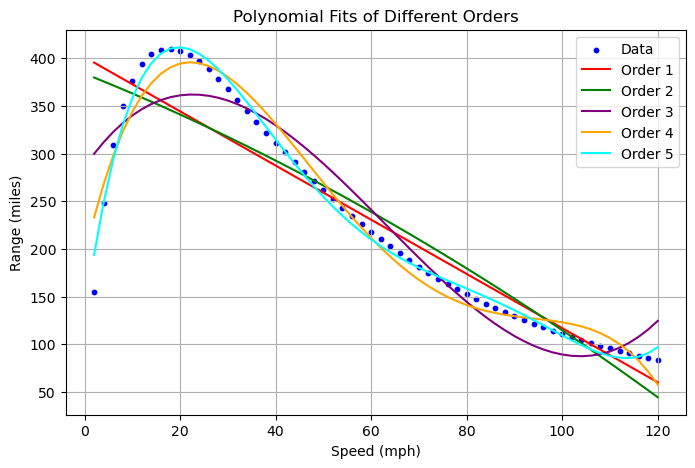

[2173.811316495322,
 2119.6223333101834,
 1003.1537150157565,
 313.26215510237193,
 83.001704794938]

In [19]:
from numpy.polynomial import Polynomial
from sklearn.metrics import mean_squared_error

# Extract the Speed and Range data for fitting
x = df_raw['Speed [mph]'].values
y = df_raw['Range [mi]'].values

# Lists to store results
polynomials = []
mse_values = []

# Fit polynomials of different orders and calculate their MSE
for order in range(1, 6):
    p = Polynomial.fit(x, y, order)
    y_pred = p(x)
    mse = mean_squared_error(y, y_pred)
    
    polynomials.append(p)
    mse_values.append(mse)

# Plot the data and the fitted curves
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Data', s=10)
colors = ['red', 'green', 'purple', 'orange', 'cyan']
for order, (p, color) in enumerate(zip(polynomials, colors), 1):
    plt.plot(x, p(x), color=color, label=f'Order {order}')

plt.title('Polynomial Fits of Different Orders')
plt.xlabel('Speed (mph)')
plt.ylabel('Range (miles)')
plt.legend()
plt.grid(True)
plt.show()

mse_values

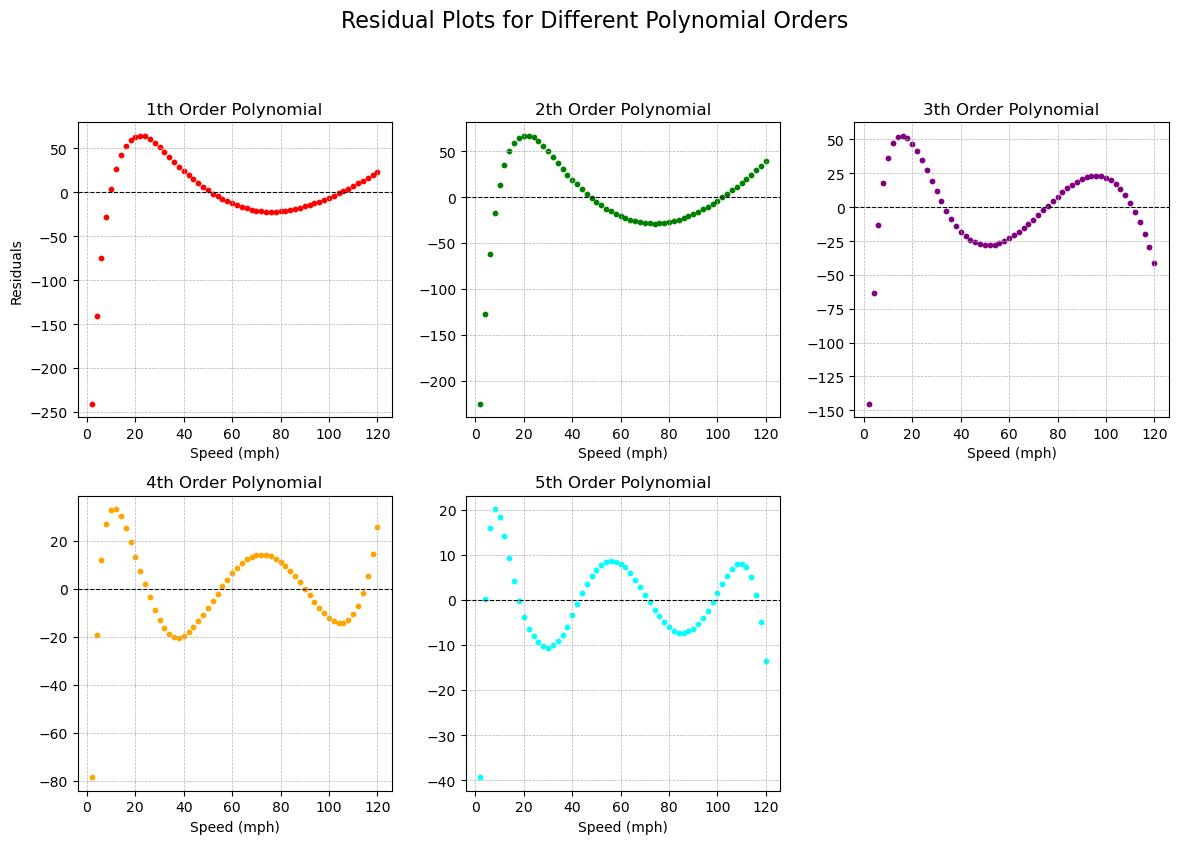

In [15]:
# Plot the residuals for each polynomial fit in a presentable manner
plt.figure(figsize=(12, 8))

for order, (p, color) in enumerate(zip(polynomials, colors), 1):
    residuals = y - p(x)
    ax = plt.subplot(2, 3, order)
    ax.scatter(x, residuals, color=color, s=10)
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.set_title(f'{order}th Order Polynomial')
    ax.set_xlabel('Speed (mph)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Set y-label only for the first plot for clarity
    if order == 1:
        ax.set_ylabel('Residuals')

plt.suptitle('Residual Plots for Different Polynomial Orders', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


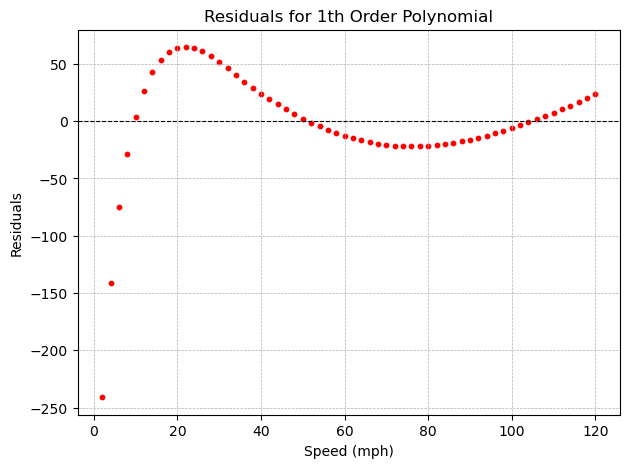

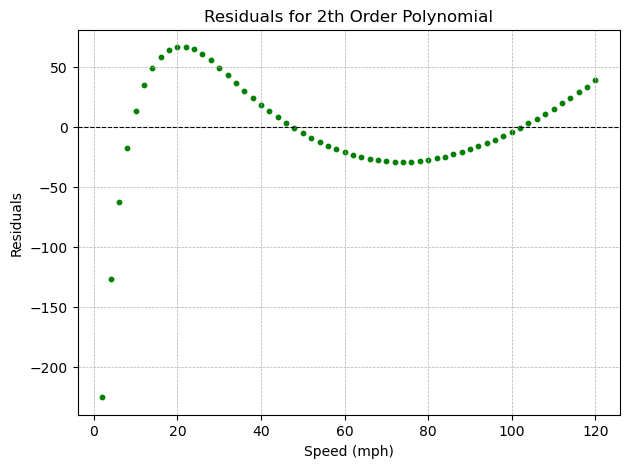

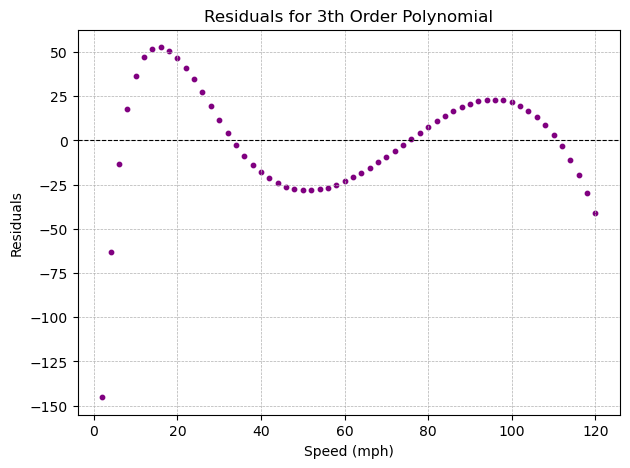

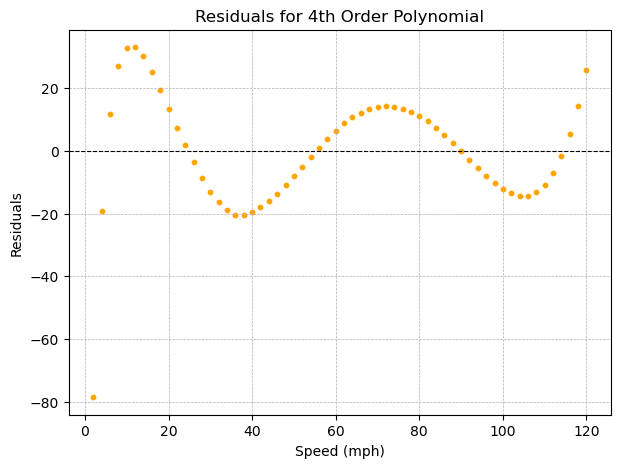

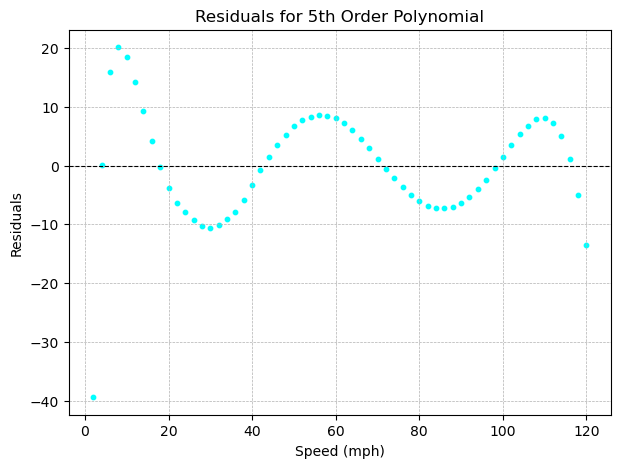

In [18]:
# Function to plot individual residuals for a given polynomial order
def plot_residuals_for_order(order, p, color):
    residuals = y - p(x)
    plt.figure(figsize=(7, 5))
    plt.scatter(x, residuals, color=color, s=10)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.title(f'Residuals for {order}th Order Polynomial')
    plt.xlabel('Speed (mph)')
    plt.ylabel('Residuals')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Plot residuals for each polynomial order individually
for order, (p, color) in enumerate(zip(polynomials, colors), 1):
    plot_residuals_for_order(order, p, color)

In [21]:
from scipy.stats import f

def corrected_fisher_test(y, model1, order1, model2, order2):
    """
    Perform the corrected Fisher test comparing two models.
    
    Parameters:
    - y: observed values
    - model1: predicted values from the simpler model
    - order1: order of the simpler model
    - model2: predicted values from the more complex model
    - order2: order of the more complex model
    
    Returns:
    - F-statistic
    - p-value
    """
    # Residual sum of squares
    rss1 = sum((y - model1)**2)
    rss2 = sum((y - model2)**2)
    
    # Degrees of freedom
    df1 = len(y) - (order1 + 1)
    df2 = len(y) - (order2 + 1)
    
    # F-statistic
    F = ((rss1 - rss2) / (df1 - df2)) / (rss2 / df2)
    
    # p-value
    p_value = 1 - f.cdf(F, df1 - df2, df2)
    
    return F, p_value

# Perform the corrected Fisher tests comparing the polynomial models
corrected_f_values = []
corrected_p_values = []

for i in range(4):
    F, p_value = corrected_fisher_test(y, polynomials[i](x), i+1, polynomials[i+1](x), i+2)
    corrected_f_values.append(F)
    corrected_p_values.append(p_value)

corrected_f_values, corrected_p_values

([1.457227541440932, 62.32568517528336, 121.1255020027436, 149.80492686651124],
 [0.2323574260334853,
  1.1525813636836801e-10,
  1.6653345369377348e-15,
  1.1102230246251565e-16])

In [30]:
import classlib4334
for i in range(4):
    classlib4334.compare_nested(x, y, polynomials[i], polynomials[i+1])

ValueError: Unable to determine number of fit parameters.